12 steps to Navier-Stokes
======
***

Step 2: Non-linear Convection
-----
***

Now we're going to implement non-linear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*  We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Julia code starts by using the necessary packages. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [10]:
using PyPlot
nx = 41 ; # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2/(nx-1);
nt = 25 ;   #nt is the number of timesteps we want to calculate
dt = .025 ; #dt is the amount of time each timestep covers (delta t)
c = 1;      #assume wavespeed of c = 1
u = ones(nx);    # function ones()
s=Int(0.5/dx);e=Int(1/dx);
u[s:e]= 2;
un = ones(nx); #initialize a temporary array

41-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

The code snippet below is *unfinished*. We have copied over the line from Step 1 that executes the time-stepping update. Can you edit this code to execute the non-linear convection instead?

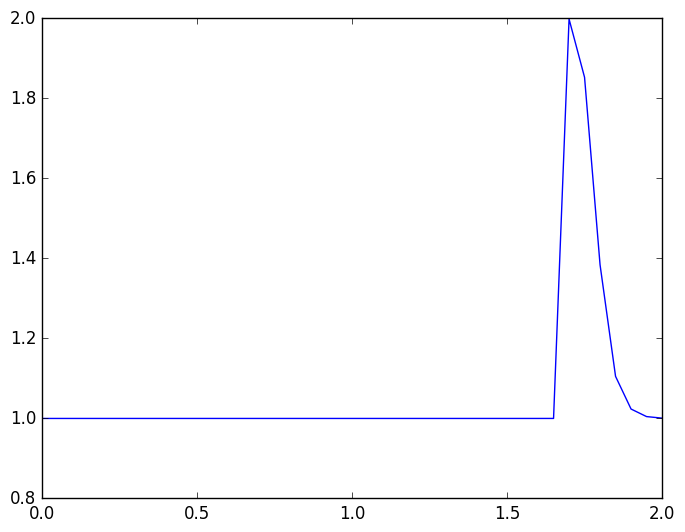

In [11]:
for n in 1:nt #loop for values of n from 0 to nt, so it will run nt times
    un = copy(u) ##copy the existing values of u into un
    for i in 2:nx ## you can try commenting this line and...
        u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1]);
    end
end
plot(linspace(0,2,nx),u);      

What do you observe about the evolution of the hat function under the non-linear convection equation? What happens when you change the numerical parameters and run again?